In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generemos unos datos de una mezcla de gaussianas

La idea es la siguiente: vamos a tener dos generadores de números aleatorios gaussianos, pero vamos a seleccionar entre ellos con una distribución binomial.


In [3]:
# Probabilidad de elegir distribución 0 o 1
phi=0.4

# Media y desviación estándar de la distribución 0
mu0=1
sd0=0.2

# Media y desviación estándar de la distribución 1
mu1=2.5
sd1=0.5

In [8]:
numsamples=(10000,1)

s0=np.random.normal(mu0,sd0,numsamples)
s1=np.random.normal(mu1,sd1,numsamples)

c=np.random.binomial(1,phi,numsamples)



In [9]:
s = s0*(1-c) + s1*c

(array([0.00128001, 0.00256002, 0.01152007, 0.02176014, 0.06912045,
        0.15872103, 0.30592198, 0.62464404, 0.83968543, 1.10720716,
        1.1750476 , 1.10208713, 0.90496585, 0.65792426, 0.36224234,
        0.20736134, 0.12288079, 0.09472061, 0.06016039, 0.08960058,
        0.12544081, 0.12544081, 0.17408113, 0.19200124, 0.23040149,
        0.23680153, 0.28288183, 0.27904181, 0.30336196, 0.33536217,
        0.31872206, 0.33152214, 0.29696192, 0.2931219 , 0.26752173,
        0.21504139, 0.20608133, 0.15744102, 0.1075207 , 0.10624069,
        0.08960058, 0.05248034, 0.04480029, 0.03328022, 0.02176014,
        0.02688017, 0.01408009, 0.00512003, 0.00384002, 0.00384002]),
 array([0.17551599, 0.25364049, 0.33176498, 0.40988948, 0.48801397,
        0.56613847, 0.64426296, 0.72238746, 0.80051195, 0.87863645,
        0.95676094, 1.03488543, 1.11300993, 1.19113442, 1.26925892,
        1.34738341, 1.42550791, 1.5036324 , 1.5817569 , 1.65988139,
        1.73800589, 1.81613038, 1.89425488, 1.

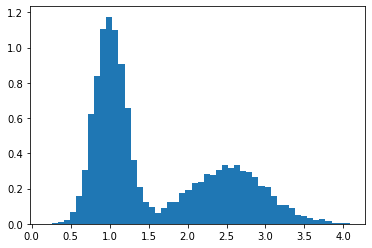

In [11]:
plt.hist(s,bins=50,density=True)

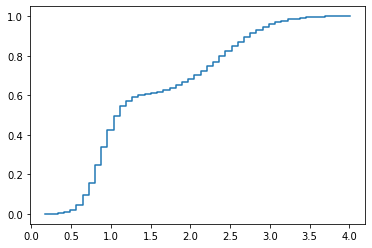

In [19]:
# 1. Cómo extraer un vector con el histograma
# 2. Cómo calcular la distribución acumulada

h,e = np.histogram(s,bins=50,density=True)
a = np.cumsum(h)
a=a/a[-1]
plt.step(e[:-1],a)

# Teorema del límite central

Para observar experimentalmente el teorema del límite central:

1. Genere varios sets de datos distribuidos uniformemente entre -1 y 1
   Use por ejemplo una matriz, donde cada fila contienen bastantes muestras 
2. Vaya incrementando paulatinamente el número de filas de la matriz de 1 a 100
3. Para cada número de filas, calcule la suma a lo largo de las columnas 
4. Grafique el histograma en cada caso
5. ¿Hacia qué converge la distribución?

In [36]:
a=np.random.uniform(-1,1,size=(1,10))
a

array([[-0.3913971 ,  0.03808373,  0.232538  , -0.24162685, -0.86520281,
        -0.73023557, -0.44898999, -0.39320153, -0.51738313, -0.59659815]])

Factores= 1
Factores= 2
Factores= 3
Factores= 4
Factores= 5
Factores= 6
Factores= 7
Factores= 8
Factores= 9


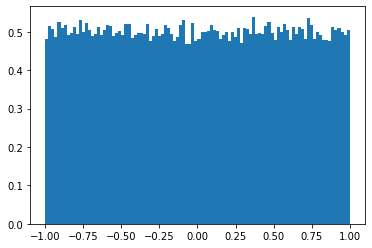

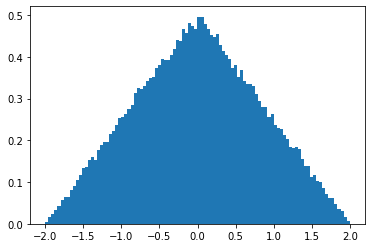

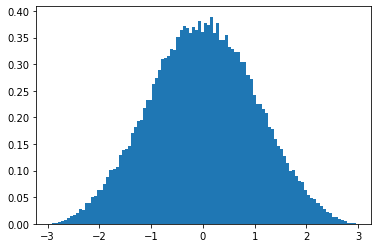

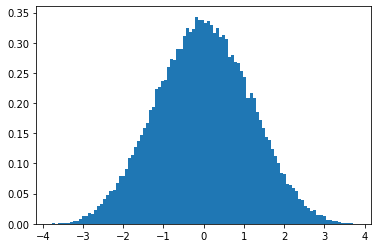

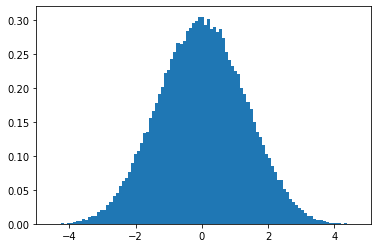

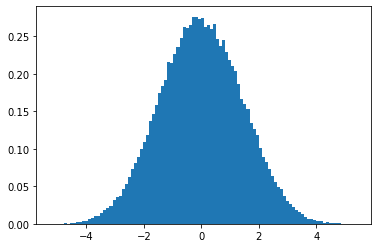

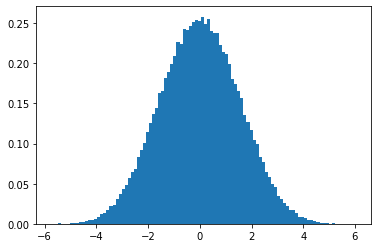

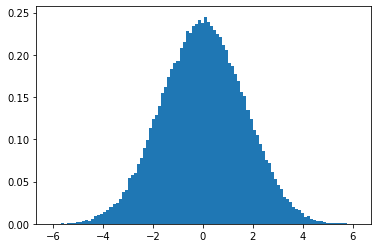

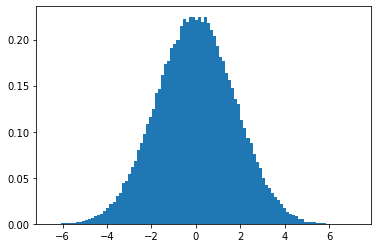

In [47]:
muestras=100000

for factores in range(1,10):
    print("Factores=",factores)
    a=np.random.uniform(-1,1,size=(factores,muestras))
    combined=np.sum(a,axis=0)
    plt.figure()
    plt.hist(combined,bins=100,density=True)

In [22]:
M=np.random.uniform(0,1,size=(3,4))

In [23]:
M

array([[0.55824864, 0.32673956, 0.86318508, 0.57745307],
       [0.05317145, 0.41071407, 0.96446332, 0.2243871 ],
       [0.55598229, 0.05447327, 0.28734742, 0.80362065]])

In [25]:
np.sum(M,axis=1)

array([2.32562635, 1.65273593, 1.70142364])